# ML Project - Home Loan Prediction
---

This project is a standard supervised classification task which aims to predict whether a loan would be approved or not. We will use a [dataset](Loan_Home.csv)  containing various attributes such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, Loan Status, etc, and obtained from https://www.kaggle.com/datasets/gavincanacam/home-loan-predictions/data

The goal is to perform all the necessary machine learning steps in order to build a predictive model and predict whether or not a loan would be approved.
To achieve this, we employed three different machine learning models : Random Forest Classifier, Logistic Regression, and Support Vector Classifier (SVC). 


## Notebook content

1. Imports and Data Loading + EDA and Visualization
2. Data Cleaning and Data Preparation
3. Create Random Forest Classifier model
4. Create Logistic Regression model
5. Create Support Vector Classifier (SVC) model
6. Make prediction

## 1. Imports and Data Loading + EDA and Visualization

### 1.1. Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the file
df = pd.read_csv('./Loan_Home.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 1.2. EDA and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Check for duplicates
df.duplicated().any()

False

In [6]:
#Creating copy of df
df2 = df.copy()

In [7]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
#Dropping unnecessary column
df2.drop('Loan_ID',axis=1,inplace=True)

In [8]:
#Let's get a list of all object type columns and separate with numerical

cat_feat=[]
num_feat=[]
for i in df2.columns.tolist():
    if df2[i].dtype=='object':
        cat_feat.append(i)
    else:
        num_feat.append(i)

In [9]:
df2['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

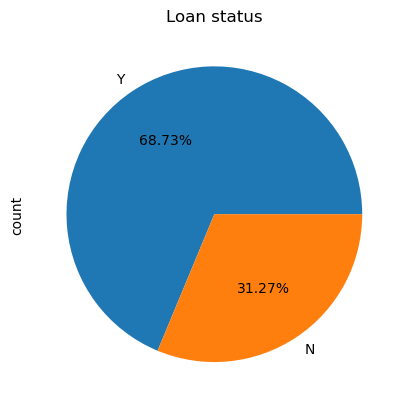

In [10]:
#Pie plot
df2['Loan_Status'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Loan status')
plt.show()

We can notice that 68.73% of the 614 customers were approved for the loan and 31.27 were not.

In [11]:
# Let's visualize each variables in all categorical features
cat_feat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Feature:  Gender
Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64


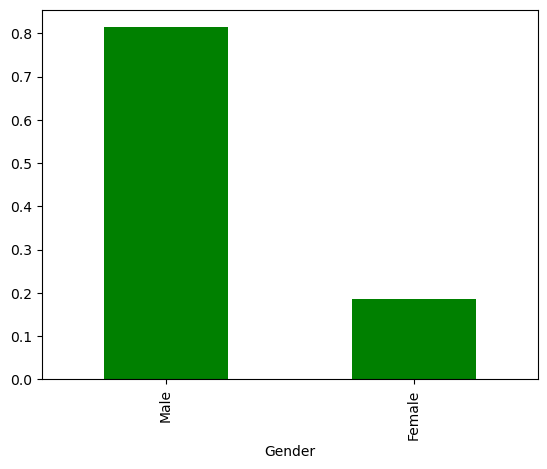



Feature:  Married
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64


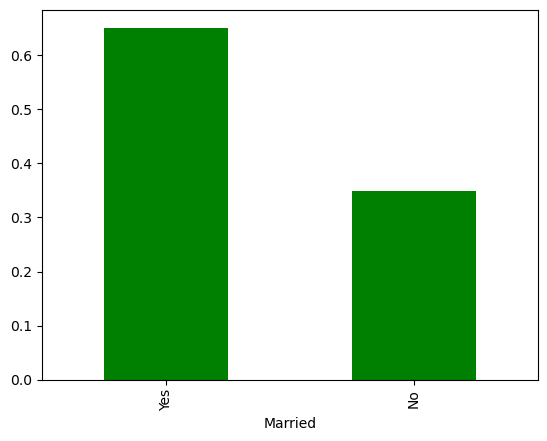



Feature:  Dependents
Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64


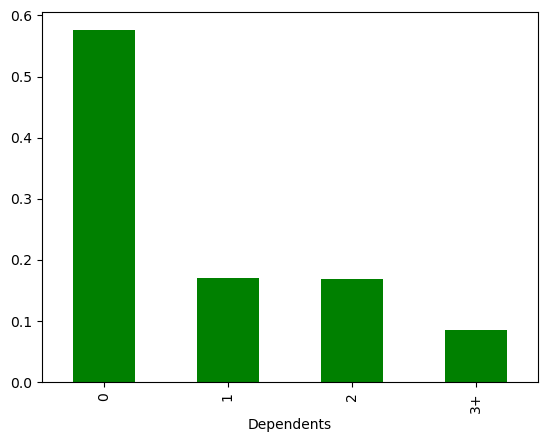



Feature:  Education
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64


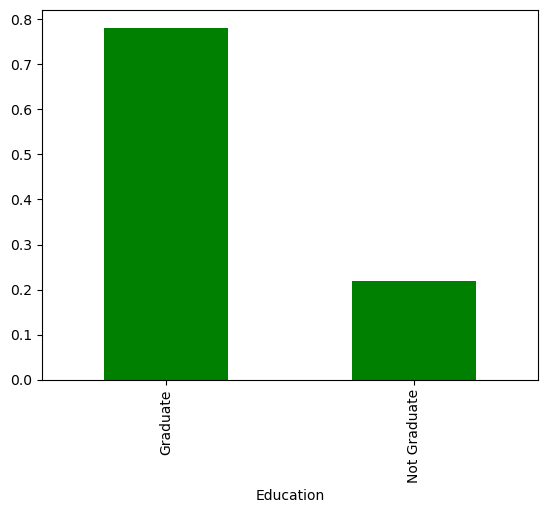



Feature:  Self_Employed
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64


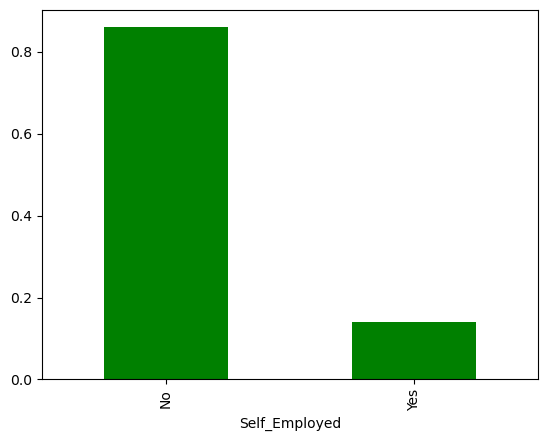



Feature:  Property_Area
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64


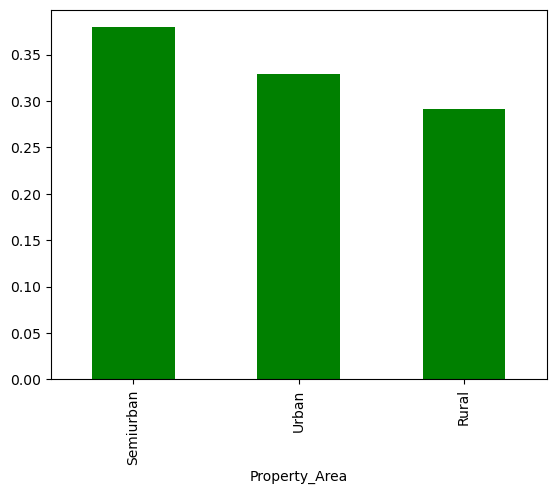



Feature:  Loan_Status
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


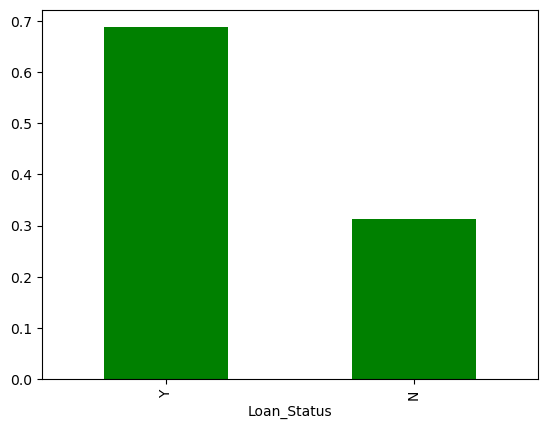

In [12]:
for i in cat_feat:
    print('Feature: ',i)
    print(df2[i].value_counts(normalize=True))
    df2[i].value_counts(normalize=True).plot(kind='bar', color= 'green')
    plt.xlabel(i)
    plt.show()
    print('\n')

From The above visualizations it can be inferred that:

Around 81% customers are Male and 19% are Female. In the second figure we can notice that 65% customers are Married and 35% are not. In the 3rd figure we can notice that most of the customers don't have any dependents (58%) and only 8% have 3 or more dependents. In the 4th we can see that 78% customers are Graduate anf 22% are not. In the 5th figure we can see that only 14% customers are self employed and 86% are not. In the 6th we can notice that 38% customers are from semiurban area, 33% are from urban area and 29% are from rural area.

In [13]:
# Now let's do the same thing with all numerical features
num_feat

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

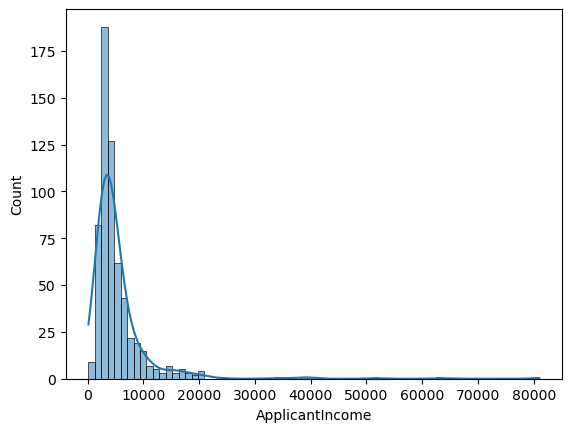

In [14]:
sns.histplot(df2['ApplicantIncome'],bins=70,kde=True)
plt.show()

From the above visualization it can be inferred that the Applicant Income Feature does not follow normal distribution, most of the income ranges from 0-20,000

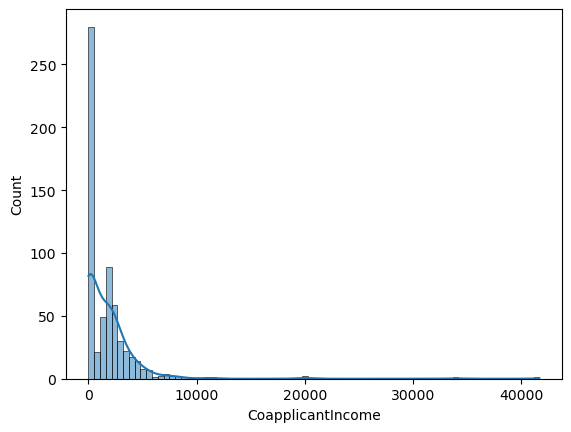

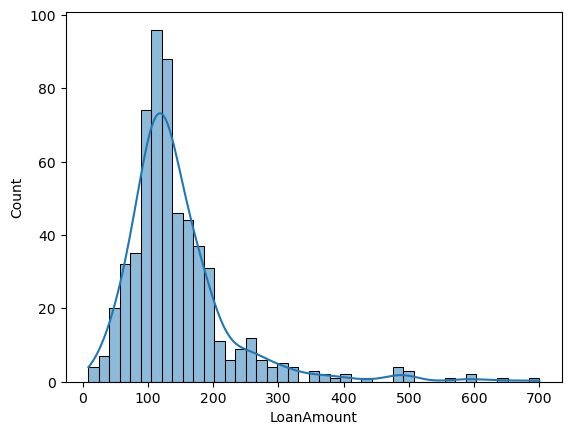

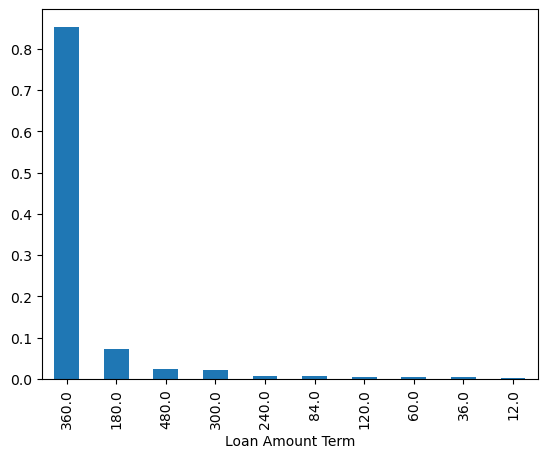

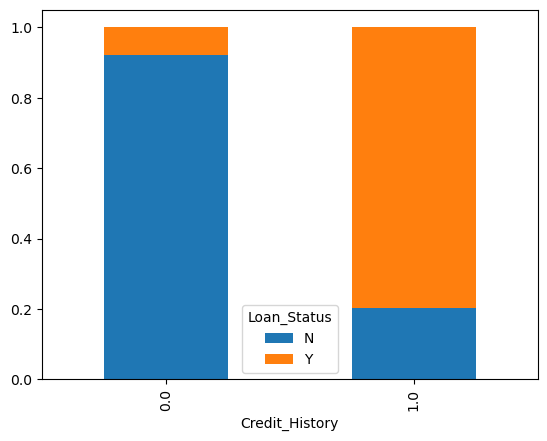

In [15]:
sns.histplot(df2['CoapplicantIncome'],kde=True)
plt.show()

sns.histplot(df2['LoanAmount'],kde=True)
plt.show()

df2['Loan_Amount_Term'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Loan Amount Term')
plt.show()

credit_history=pd.crosstab(df2['Credit_History'],df2['Loan_Status'])
credit_history.div(credit_history.sum(axis=1),axis=0).plot(kind='bar',stacked=True)
plt.show()

we can notice that customers with credit score 1 are more likely to get loan approval

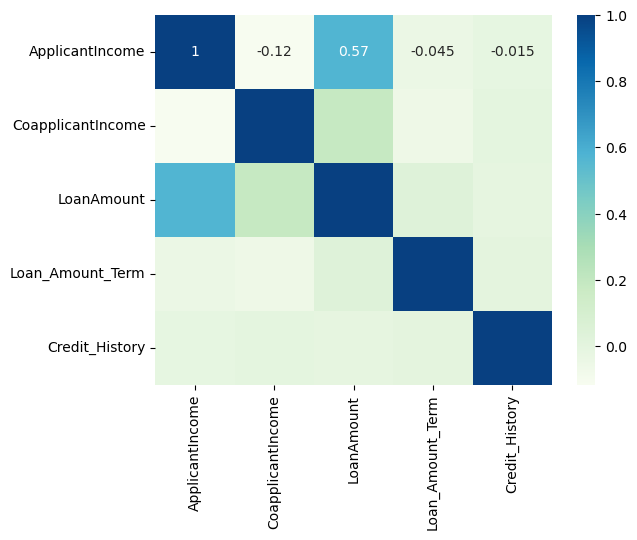

In [16]:
# Lets see the correlation of numerical values
sns.heatmap(df2.corr(numeric_only=True), cmap = 'GnBu', annot = True)
plt.show()

Only a great correlation between Loan Amount and Application Income

## 2. Data Cleaning and Data Preparation

In [17]:
#Let's handle missing values 
df2.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#We fill null values in numerical columns with mean
df2['LoanAmount'] = df2['LoanAmount'].fillna(round(df2['LoanAmount'].mean(),2))
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].fillna(round(df2['Loan_Amount_Term'].mean(),2))
df2['Credit_History'] = df2['Credit_History'].fillna(round(df2['Credit_History'].mean(),2))

In [19]:
#We fill null values in categorical columns
df2["Gender"].fillna(df2["Gender"].mode()[0],inplace=True)
df2["Married"].fillna(df2["Married"].mode()[0],inplace=True)
df2['Dependents'].fillna(df2["Dependents"].mode()[0],inplace=True)
df2["Self_Employed"].fillna(df2["Self_Employed"].mode()[0],inplace=True)

In [20]:
# We can check for missing values again
df2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Enconding

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [22]:
cat_feat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [23]:
#List of Yes/No columns
yes_no = list(df2.columns[df2.isin(['Yes']).any()])
yes_no

['Married', 'Self_Employed']

In [24]:
#Convert Yes/No to 1/0
mapping = {'Yes':1,'No':0}
col_map =['Married', 'Self_Employed']

df2[col_map] = df2[col_map].replace(mapping)

In [25]:
# Convert loan status
mapping = {'Y':1,'N':0}
col_map ='Loan_Status'

df2[col_map] = df2[col_map].replace(mapping)

In [26]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,0,5849,0.0,146.41,360.0,1.0,Urban,1
1,Male,1,1,Graduate,0,4583,1508.0,128.00,360.0,1.0,Rural,0
2,Male,1,0,Graduate,1,3000,0.0,66.00,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,0,2583,2358.0,120.00,360.0,1.0,Urban,1
4,Male,0,0,Graduate,0,6000,0.0,141.00,360.0,1.0,Urban,1


In [27]:
col_to_transform=['Gender','Education','Property_Area']

In [28]:
#Transforming
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),col_to_transform))
transformed=transformer.fit_transform(df2)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.index=df2.index
#Joining tables
df2=pd.concat([df2,transformed_df],axis=1)
#Dropping all categorical columns
df2.drop(col_to_transform,axis=1, inplace=True)
#Now let's check result
df2.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,onehotencoder__Gender_Female,onehotencoder__Gender_Male,onehotencoder__Education_Graduate,onehotencoder__Education_Not Graduate,onehotencoder__Property_Area_Rural,onehotencoder__Property_Area_Semiurban,onehotencoder__Property_Area_Urban
0,0,0,0,5849,0.0,146.41,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,4583,1508.0,128.00,360.0,1.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1,0,1,3000,0.0,66.00,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,0,0,2583,2358.0,120.00,360.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,0,0,6000,0.0,141.00,360.0,1.0,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [29]:
print(df2.columns)

Index(['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'onehotencoder__Gender_Female',
       'onehotencoder__Gender_Male', 'onehotencoder__Education_Graduate',
       'onehotencoder__Education_Not Graduate',
       'onehotencoder__Property_Area_Rural',
       'onehotencoder__Property_Area_Semiurban',
       'onehotencoder__Property_Area_Urban'],
      dtype='object')


In [30]:
#We rename features
df2.columns = [['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Female',
       'Male', 'Graduate',
       'Not Graduate',
       'Property_Area_Rural',
       'Property_Area_Semiurban',
       'Property_Area_Urban']]

In [31]:
df2.dtypes

Married                      int64
Dependents                  object
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Female                     float64
Male                       float64
Graduate                   float64
Not Graduate               float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

In [32]:
# We can see that Dependents is an object column, let's transform it
# First we check unique values in the column
df2['Dependents'].value_counts()

(Dependents,)
0                360
1                102
2                101
3+                51
Name: count, dtype: int64

In [33]:
df2['Dependents'] = df2['Dependents'].replace('3+',3)

In [34]:
df2['Dependents'].value_counts()

(Dependents,)
0                360
1                102
2                101
3                 51
Name: count, dtype: int64

In [35]:
df2.dtypes

Married                      int64
Dependents                  object
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Female                     float64
Male                       float64
Graduate                   float64
Not Graduate               float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

In [36]:
#Now we convert it from object to float
df2['Dependents'] = df2['Dependents'].astype(float)

In [37]:
# We check again
df2.dtypes

Married                      int64
Dependents                 float64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Female                     float64
Male                       float64
Graduate                   float64
Not Graduate               float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

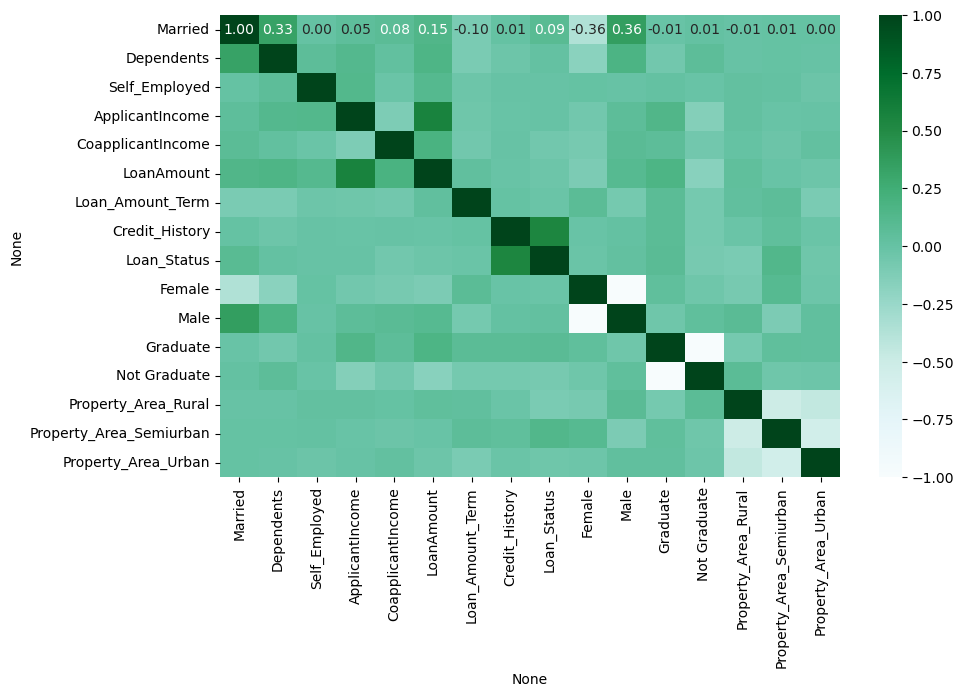

In [38]:
# Let's see correlation
correlation = df2.corr(numeric_only=True)

# Correlation barplot
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='BuGn')
plt.show()

From this heatmap we can see that loan status and credit history have a great correlation. 
Now, let's create our first model.


## 3. Random Forest Classifier model

In [39]:
#Let's prepare data for analysis
#We separate the features from labels into 2 object X and y

X_r1 = df2.drop('Loan_Status',axis=1)
y_r1 = df2['Loan_Status']

In [40]:
# Train-test split
Xr1_train, Xr1_test, yr1_train, yr1_test = train_test_split(X_r1, y_r1, test_size=0.3, random_state=101)

In [41]:
# Create instance of model
rfc = RandomForestClassifier(max_depth = 7)

# Fit model
rfc.fit(Xr1_train, yr1_train)

# Model prediction
yr1_pred = rfc.predict(Xr1_test)

In [42]:
# Obtain accuracy of model
from sklearn.metrics import accuracy_score

print('Model accuracy score with default parameters: {0:0.4f}'. format(accuracy_score(yr1_test, yr1_pred)))

Model accuracy score with default parameters: 0.7784


In [43]:
# Print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(Xr1_train, yr1_train)))

print('Test set score: {:.4f}'.format(rfc.score(Xr1_test, yr1_test)))

Training set score: 0.8765
Test set score: 0.7784


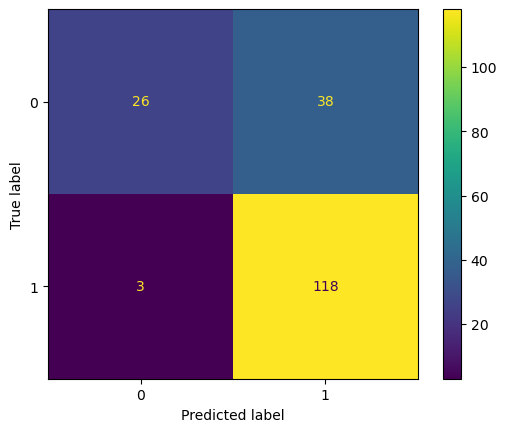

In [44]:
#Plot confusion matrix
cm = confusion_matrix(yr1_test,yr1_pred)
disp =ConfusionMatrixDisplay(cm,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [45]:
# Classification report

print(classification_report(yr1_test,yr1_pred))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



Our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.
We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.

In [46]:
# Create param_grid for gridsearch
param_grid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
# Grid search
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid,cv=5)

# Fit model
grid.fit(Xr1_train, yr1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [47]:
# Best estimators for model
grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 81,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Creating model with best estimators
model_grid = RandomForestClassifier(bootstrap= True,max_depth=1, n_estimators=101, class_weight='balanced', criterion='gini')

model_grid.fit(Xr1_train, yr1_train)
y_pred_grid = model_grid.predict(Xr1_test)
print(classification_report(yr1_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



In [49]:
# Obtain accuracy of model
print('Model accuracy score with hyperparameter tuning: {0:0.4f}'. format(accuracy_score(yr1_test, y_pred_grid)))

Model accuracy score with hyperparameter tuning: 0.7784


We can notice that our classification report is the same despite the use of Grid Search. Let's see if we can improve it.

In [51]:
# Checking importance score of feature using .feature_importances__ tool
feature_scores = pd.Series(model_grid.feature_importances_, index=Xr1_train.columns).sort_values(ascending=True)
feature_scores

Female                     0.000000
Male                       0.009901
Self_Employed              0.019802
Married                    0.039604
Not Graduate               0.039604
Property_Area_Rural        0.039604
Graduate                   0.049505
Dependents                 0.059406
Loan_Amount_Term           0.059406
Property_Area_Urban        0.059406
CoapplicantIncome          0.079208
Property_Area_Semiurban    0.089109
ApplicantIncome            0.128713
LoanAmount                 0.158416
Credit_History             0.168317
dtype: float64

We can see some features with a score of 0 and around (Female, male, Self_Employed), let's drop them and evaluate the impact on accuracy.

In [52]:
#New X and y 
X_r2 = df2.drop(columns=(['Self_Employed','Female',
                        'Male','Loan_Status']),axis=1)
y_r2 = df2['Loan_Status']

In [53]:
Xr2_train, Xr2_test, yr2_train, yr2_test = train_test_split(X_r2, y_r2, test_size = 0.3, random_state = 101)

forest_grid= GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid,cv=5)

forest_grid.fit(Xr2_train, yr2_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [54]:
# Best estimators for model
forest_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 121,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Final Random forest model
forest_final = RandomForestClassifier(bootstrap= True,max_depth=1, n_estimators=81,
                                      class_weight='balanced', criterion='gini')

forest_final.fit(Xr2_train, yr2_train)
# Evaluate model
y_pred_forest = forest_final.predict(Xr2_test)

# Check accuracy score
print('Model accuracy score with unimportant features removed : {0:0.4f}'. format(accuracy_score(yr2_test, y_pred_forest)))

Model accuracy score with unimportant features removed : 0.7784


In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(forest_final.score(Xr2_train, yr2_train)))

print('Test set score: {:.4f}'.format(forest_final.score(Xr2_test, yr2_test)))

Training set score: 0.8252
Test set score: 0.7784


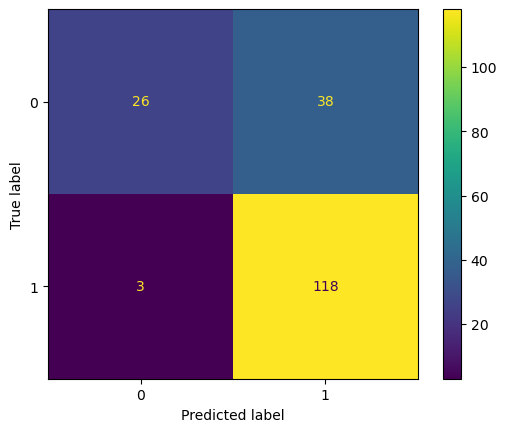

In [57]:
# Plot confusion Matrix
cm_forest = confusion_matrix(yr2_test,y_pred_forest)
disp =ConfusionMatrixDisplay(cm_forest,display_labels=forest_final.classes_)
disp.plot()
plt.show()

In [58]:
# Classification report of final RFC model
print(classification_report(yr2_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



In [59]:
# Check accuracy score
print('Model accuracy score with unimportant features removed : {0:0.4f}'. format(accuracy_score(yr2_test, y_pred_forest)))

Model accuracy score with unimportant features removed : 0.7784


Again, we can notice that the classification report is the same. The accuracy score is 0.78 with random forest model. Let's try with another model!

## 4. Logistic Regression model

In [62]:
#Let's prepare data for analysis
#We separate the features from labels into 2 object X and y
X_lr = df2.drop(['Loan_Status'],axis=1)
y_lr = df2['Loan_Status']

# Train-test split
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=101)

# Scale data
scaler = StandardScaler()
scaled_Xlr_train = scaler.fit_transform(Xlr_train)
scaled_Xlr_test = scaler.transform(Xlr_test)

# Create a logistic Regression model and fit
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
log_model.fit(scaled_Xlr_train, ylr_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

In [63]:
# Model prediction
ylr_pred = log_model.predict(scaled_Xlr_test)

In [64]:
# Accuracy score
accuracy = accuracy_score(ylr_test, ylr_pred)
print('Model accuracy score with default parameters:{:.4f}'.format(accuracy))

Model accuracy score with default parameters:0.7784


[[ 26  38]
 [  3 118]]


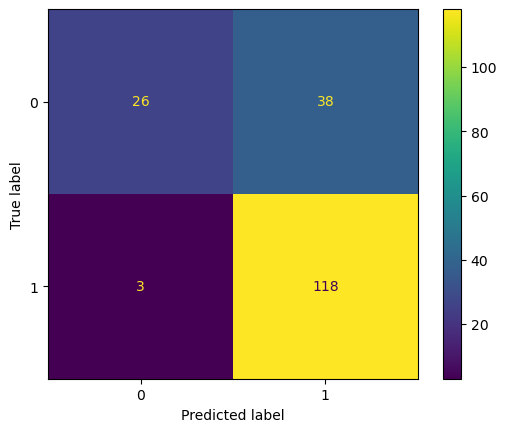

In [65]:
# Confusion matrix
cm = confusion_matrix(ylr_test, ylr_pred)
print(cm)

# Confusion matrix plot
disp = ConfusionMatrixDisplay(cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [66]:
# Classification report
log_report = classification_report(ylr_test, ylr_pred)
print(log_report)

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



In [67]:
#New X and y
X_lr2 = df2.drop(columns=(['Self_Employed','Female',
                               'Male','Property_Area_Rural',
                               'Loan_Status']),axis=1)
y_lr2 = df2['Loan_Status']
# Train-test split
Xlr2_train, Xlr2_test, ylr2_train, ylr2_test = train_test_split(X_lr2, y_lr2, test_size=0.3, random_state=101)

In [68]:
#GridSearch for Best Hyper-Parameters with penalty and C value

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

# We initialize a GridSearchCV object with our logic regression model and parameter grid
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [69]:
# Scale data
scaler = StandardScaler()
scaled_Xlr2_train = scaler.fit_transform(Xlr2_train)
scaled_Xlr2_test = scaler.transform(Xlr2_test)

In [70]:
# Fit model
grid_model.fit(scaled_Xlr2_train,ylr2_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [71]:
# We repport back our search's best parameters
grid_model.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [72]:
# Creating model with best estimators

best_model = grid_model.best_estimator_
ylr2_pred = best_model.predict(scaled_Xlr2_test)

# Classification report
report2 = classification_report(ylr2_test, ylr2_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.90      0.41      0.56        64
           1       0.76      0.98      0.85       121

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.80      0.78      0.75       185



In [73]:
# Check accuracy score
print('Model accuracy score with unimportant features removed : {0:0.4f}'. format(accuracy_score(ylr2_test, ylr2_pred)))

Model accuracy score with unimportant features removed : 0.7784


We have the same classification report with 0.78 accuracy

## 5. Support Vector Classifier (SVC) model

In [74]:
# Seperating X features and y
X_sv = df2.drop(columns=(['Self_Employed','Female',
                               'Male','Property_Area_Rural',
                               'Loan_Status']),axis=1)
y_sv = df2['Loan_Status']

In [75]:
# Train-test split
from sklearn.model_selection import train_test_split
Xsv_train, Xsv_test, ysv_train, ysv_test = train_test_split(X_sv, y_sv, test_size=0.3, random_state=1)

In [76]:
# Scale data

scaler = StandardScaler()
scaled_Xsv_train = scaler.fit_transform(Xsv_train)
scaled_Xsv_test = scaler.transform(Xsv_test)

In [77]:
# Instance of model

model_svc = SVC(class_weight='balanced')

In [78]:
# Gridsearch

param = {'C': [0.001,0.01,0.1,0.5,1],
         'gamma': ['scale','auto'],
         'kernel': ['rbf','poly','linear','sigmoid']
        }

svc_grid = GridSearchCV(model_svc,param_grid=param)

In [79]:
svc_grid.fit(scaled_Xsv_train,ysv_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [80]:
svc_grid.best_params_

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [81]:
#Create SVC model with best parameters
svc_final = SVC(class_weight='balanced',
                C=0.01,
                gamma = 'scale',
                kernel = 'linear')
svc_final.fit(scaled_Xsv_train,ysv_train)

SVC(C=0.01, class_weight='balanced', kernel='linear')

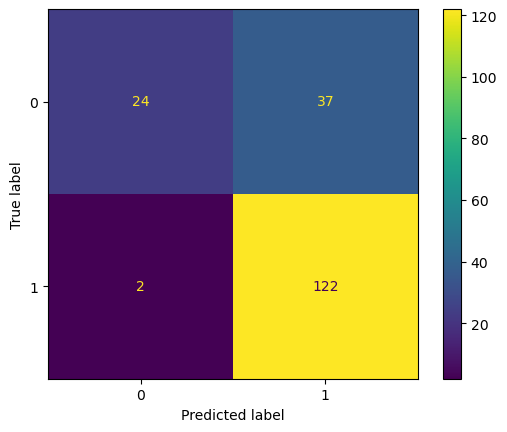

In [82]:
# Confusion matrix
# model predictions
y_pred_svc = svc_final.predict(scaled_Xsv_test)

cm = confusion_matrix(ysv_test,y_pred_svc)
disp =ConfusionMatrixDisplay(cm,display_labels=svc_final.classes_)
disp.plot()
plt.show()

In [83]:
# Classification report
print(classification_report(ysv_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185



From the above results it is clear that Support Vector Classifier is giving the best accuracy score (79%). So, we will apply this model to our input data.

## 6. Prediction 

We'll choose SVC for our prediction

In [84]:
X_sv.columns

MultiIndex([(                'Married',),
            (             'Dependents',),
            (        'ApplicantIncome',),
            (      'CoapplicantIncome',),
            (             'LoanAmount',),
            (       'Loan_Amount_Term',),
            (         'Credit_History',),
            (               'Graduate',),
            (           'Not Graduate',),
            ('Property_Area_Semiurban',),
            (    'Property_Area_Urban',)],
           )

In [86]:
# We use SVC model to predict

input_data = [[1,2,3200,10,900,360,1,1,0,1,0]]
prediction =svc_final.predict(input_data)
print(f"The loan is {'approved' if prediction[0] == 1 else 'not Approved'}")

The loan is approved


According to our result, the loan will be approved.